In [1]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

from sklearn.model_selection import train_test_split

## Veri setini yüklemek

In [2]:
Cats_path = '/content/drive/MyDrive/GlobalAIHub/Cats/'
Dogs_path = '/content/drive/MyDrive/GlobalAIHub/Dogs/'

## Görüntüleri aynı boyuta getirerek labelları ile listelemek

Bütün resimler aynı boyutta olmalı

In [3]:
os.mkdir('/content/Cats_resized')
os.mkdir('/content/Dogs_resized')

In [4]:
# toplam 1000 tane resmi kullanacağım 
for i in range(500):
  cat_img = Cats_path+str(i)+".jpg"
  dog_img = Dogs_path+str(i)+".jpg"

  cimg = Image.open(cat_img)
  dimg = Image.open(dog_img)
  cimg = cimg.resize((224, 224)) # çoğu model (224, 224) şeklinde istiyor 
  dimg = dimg.resize((224, 224))
  cimg = cimg.convert('RGB')
  dimg = dimg.convert('RGB')

  # Resized resimleri ayrı bir yere kaydediyoruz
  cimg.save('/content/Cats_resized/'+str(i)+".jpg")
  dimg.save('/content/Dogs_resized/'+str(i)+".jpg")

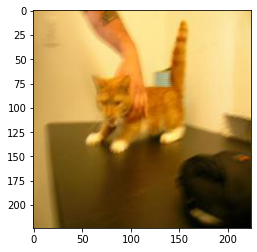

In [5]:
# CAT
im1 = np.array(Image.open('/content/Cats_resized/0.jpg'))
plt.imshow(im1)
plt.show()

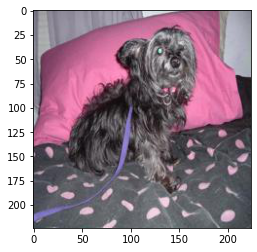

In [6]:
# DOG
im2 = np.array(Image.open('/content/Dogs_resized/0.jpg'))
plt.imshow(im2)
plt.show()

In [7]:
# 224, 224, 3 (çünkü RGB)
print("Cat chape:", im1.shape)
print("Dog chape:", im2.shape)

Cat chape: (224, 224, 3)
Dog chape: (224, 224, 3)


Label üretip liste haline getiriyoruz

Cat -> 0

Dog -> 1

olacak şekilde classify ediyoruz

In [8]:
labelled_data = []

for i in range(500):
  cat = '/content/Cats_resized/'+str(i)+".jpg"
  im_cat = Image.open(cat)
  im_cat = np.array(im_cat)

  labelled_data.append([im_cat, 0])

  dog = '/content/Dogs_resized/'+str(i)+".jpg"
  im_dog = Image.open(dog)
  im_dog = np.array(im_dog)

  labelled_data.append([im_dog, 1])


In [9]:
for label in labelled_data:
  print("image:",label[0])
  print("label:",label[1])
  print("***")

Görüntülenen çıkış son 5000 satıra kısaltıldı.
label: 1
***
image: [[[ 38  20  10]
  [ 38  20  10]
  [ 40  20  11]
  ...
  [ 46  33  24]
  [ 46  33  24]
  [ 46  33  24]]

 [[ 39  19  10]
  [ 40  20  11]
  [ 41  21  12]
  ...
  [ 46  33  24]
  [ 46  33  24]
  [ 46  33  24]]

 [[ 42  19  11]
  [ 42  19  11]
  [ 43  20  12]
  ...
  [ 46  33  24]
  [ 46  33  24]
  [ 46  33  24]]

 ...

 [[189 190 185]
  [187 188 183]
  [183 184 179]
  ...
  [ 55  76  57]
  [ 55  76  57]
  [ 53  74  55]]

 [[189 190 185]
  [187 188 183]
  [183 184 179]
  ...
  [ 51  72  53]
  [ 62  83  64]
  [ 72  93  74]]

 [[184 185 180]
  [183 184 179]
  [180 181 176]
  ...
  [ 55  76  57]
  [ 77  98  79]
  [ 96 117  98]]]
label: 0
***
image: [[[ 91  92  96]
  [ 94  95  99]
  [100 101 105]
  ...
  [ 54  40  40]
  [ 53  39  39]
  [ 56  42  42]]

 [[102 105 110]
  [102 105 110]
  [ 98 101 106]
  ...
  [ 55  41  41]
  [ 52  38  38]
  [ 50  36  36]]

 [[196 201 207]
  [196 201 207]
  [195 200 206]
  ...
  [ 62  48  48]
  [ 5

In [10]:
X = []
y = []

for label in labelled_data:
  X.append(label[0])
  y.append(label[1])

X = np.array(X)
y = np.array(y)

print(X)
print(y)

[[[[205 163  87]
   [207 165  89]
   [210 168  92]
   ...
   [245 204 125]
   [243 201 125]
   [243 201 125]]

  [[205 163  87]
   [207 165  89]
   [210 168  92]
   ...
   [245 204 125]
   [244 202 126]
   [243 201 125]]

  [[205 163  87]
   [207 165  89]
   [210 168  92]
   ...
   [243 204 125]
   [244 202 126]
   [244 202 126]]

  ...

  [[160 123  55]
   [160 123  55]
   [161 124  56]
   ...
   [  1   2   0]
   [  1   2   0]
   [  1   2   0]]

  [[158 121  53]
   [159 122  54]
   [160 123  55]
   ...
   [  1   2   0]
   [  1   2   0]
   [  1   2   0]]

  [[157 120  52]
   [157 120  52]
   [158 121  53]
   ...
   [  1   2   0]
   [  1   2   0]
   [  1   2   0]]]


 [[[117 114 133]
   [118 115 132]
   [112 110 124]
   ...
   [133 135 147]
   [132 134 146]
   [131 133 145]]

  [[118 115 134]
   [119 116 133]
   [114 112 126]
   ...
   [134 136 148]
   [133 135 147]
   [133 135 147]]

  [[119 116 135]
   [121 118 135]
   [117 115 129]
   ...
   [136 138 150]
   [135 137 149]
   [135 137

Train - Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

array([[[[ 87,  87,  85],
         [ 87,  87,  85],
         [ 93,  93,  91],
         ...,
         [140, 141, 143],
         [150, 151, 153],
         [136, 137, 139]],

        [[ 90,  90,  88],
         [ 92,  92,  90],
         [ 83,  83,  81],
         ...,
         [135, 136, 138],
         [144, 145, 147],
         [131, 132, 134]],

        [[ 77,  77,  75],
         [ 86,  86,  84],
         [ 87,  87,  85],
         ...,
         [140, 141, 143],
         [152, 153, 155],
         [139, 140, 142]],

        ...,

        [[126, 127, 129],
         [151, 152, 154],
         [149, 150, 152],
         ...,
         [124, 125, 129],
         [143, 144, 148],
         [114, 115, 119]],

        [[138, 139, 141],
         [155, 156, 158],
         [154, 155, 157],
         ...,
         [118, 119, 123],
         [152, 153, 157],
         [131, 132, 136]],

        [[141, 142, 144],
         [131, 132, 134],
         [135, 136, 138],
         ...,
         [ 95,  96, 100],
        

In [13]:
y_train

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Verileri scale etmek
255 RGB'de max sayı olduğundan ona bölerek scale edebiliriz

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

print(X_train_scaled)
print(X_test_scaled)

[[[[0.34117647 0.34117647 0.33333333]
   [0.34117647 0.34117647 0.33333333]
   [0.36470588 0.36470588 0.35686275]
   ...
   [0.54901961 0.55294118 0.56078431]
   [0.58823529 0.59215686 0.6       ]
   [0.53333333 0.5372549  0.54509804]]

  [[0.35294118 0.35294118 0.34509804]
   [0.36078431 0.36078431 0.35294118]
   [0.3254902  0.3254902  0.31764706]
   ...
   [0.52941176 0.53333333 0.54117647]
   [0.56470588 0.56862745 0.57647059]
   [0.51372549 0.51764706 0.5254902 ]]

  [[0.30196078 0.30196078 0.29411765]
   [0.3372549  0.3372549  0.32941176]
   [0.34117647 0.34117647 0.33333333]
   ...
   [0.54901961 0.55294118 0.56078431]
   [0.59607843 0.6        0.60784314]
   [0.54509804 0.54901961 0.55686275]]

  ...

  [[0.49411765 0.49803922 0.50588235]
   [0.59215686 0.59607843 0.60392157]
   [0.58431373 0.58823529 0.59607843]
   ...
   [0.48627451 0.49019608 0.50588235]
   [0.56078431 0.56470588 0.58039216]
   [0.44705882 0.45098039 0.46666667]]

  [[0.54117647 0.54509804 0.55294118]
   [0.6